# Korrektur

Viel Erfolg!

### Bewertung

#### _/17 Punkte

----

#### Bitte lösen sie die Aufgaben
- innerhalb dieses Notebooks 
- welches Sie bitte umbenennen in `A01_IHRNAME.ipynb` (IHRNAME passend ersetzen)

und schicken 

#### bis zum <span style="color:red">Sonntag 27. Mai 2017 23:00</span> (6 Tage länger Zeit!) 
eine Email
- mit Betreff `Angewandte Statistik II`
- an `uli.wannek@uni-tuebingen.de`
- mit dem ausgeführten Notebook als Anhang

#### Danke!

### Hinweise
- Text-Antworten sowie $\LaTeX$-Formeln am besten in *markdown* Zellen
    - Sie müssen nicht, dürfen aber durchaus, Text in `print('')`-Anweisungen ausgeben
    - Wenn Sie Ergebnisse aus Zellen verwenden ist `print('{}'.format())` in code-Zellen hingegen extrem praktisch
- Sie dürfen in diesem Notebook gerne alles, was nicht zu den Aufgaben gehört, löschen.
- Sie dürfen gerne (zu Ihrem späteren **und** meinem jetzigen Verständnis) Kommentare in weiteren markdown-Zellen einfügen. Das hilft wirklich!
- Es gibt Punkte für
    - Ihre Überlegung
    - Ihr Programm
    - Ihre Kommentare(!)
    - und schließlich für das richtige Ergebnis
    - mit Zusammenfassung wie zB.: *"der Mittelwert beträgt 17km/h"*
- Sie dürfen (müssen aber nicht) alle Antworten natürlich auch auch auf Deutsch verfassen.
- Lediglich Kommentare in Code-Zellen sollten (müssen aber nicht) englisch sein.    

#### Zu erreichende Punkte
(17 Punkte)

----

# Kovarianz & PCA

In [2]:
import numpy as np                       # mathematical methods
from scipy import stats                  # statistical methods
from matplotlib import pyplot as plt     # plotting methods
from scipy import stats                  # statistic methods
from sklearn.decomposition import PCA    # from sklearn import PCA
%matplotlib inline

# Aufgabe 1: Kovarianzmatrix

#### Wie ändern sich
Eigenwerte und Eigenvektoren einer Kovarianzmatrix wenn Sie in dem zugrundeliegenden Datensatz zwei Einträge (zB. Elefant und Maus) austauschen?

#### Wie ändern sich
Eigenwerten und Eigenvektoren einer Kovarianzmatrix wenn Sie den zugrundeliegenden Datensatz mit einem Faktor $\beta$ skalieren (zB. $10^{-3}$ alle Gewichte in kg statt g angeben)?

#### Wie ändern sich
Eigenwerten und Eigenvektoren einer Kovarianzmatrix wenn Sie in dem zugrundeliegenden Datensatz zwei Variablen (zB. Körpergewicht und Schlafdauer) austauschen?

(2 Punkte)

----

# Aufgabe 2: Eine ausführliche PCA

Versuchen Sie die "Buchstaben-Bilder X-T-D" aus der Vorlesung nachzuvollziehen indem Sie selbst Bilder entwerfen und die Eigenvektorzerlegung 

## A) nach "Rezept von Hand" durchführen
und  dann

## B) Vergleichen mit der Methode aus *sklearn*
indem Sie die entsprechenden Daten, Matrizen und Vektoren extrahieren

### a) Bauen Sie sich mindestens 3 Kategorien à 10 unterschiedlich verrauschte "Bilder"
Für dankbare Ergebnisse wählen Sie das Rauschen so groß, daß Standardabweichungen leicht überlappen

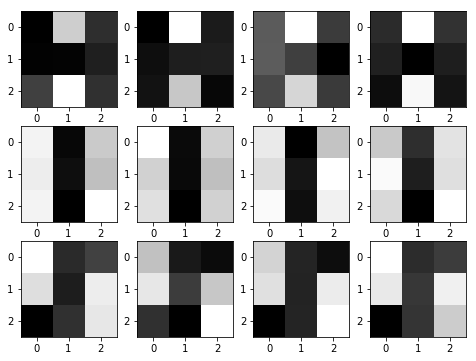

In [3]:
""" some self define example 3x3 image """
# it's only the seed of the random
np.random.seed(987654)
# size of the pixel in image
vshape = (3,3)
# the number of pixels in a image
vn = vshape[0] * vshape[1]
# create 3 type and 10 different image, each image is 3x3 pixels
v = np.zeros((vn, 30))

for i in range(0, 10): # H
    v[:, i] = 192-np.array([1, 0, 1, 1, 1, 1, 1, 0, 1])*128+15*stats.norm.rvs(size=vn)

for i in range(10, 20): # I
    v[:, i] = 192-np.array([0, 1, 0, 0, 1, 0, 0, 1, 0])*128+15*stats.norm.rvs(size=vn)

for i in range(20, 30): # S
    v[:, i] = 192-np.array([0, 1, 1, 0, 1, 0, 1, 1, 0])*128+15*stats.norm.rvs(size=vn)

"""
name:
    show_images
desc:
    this will display all the images
parameter:
    v - orignal data
"""
def show_images(v):
    # setting the size of figure
    fig = plt.figure(figsize=(8, 6))
    for i, j in enumerate((1, 2, 3, 4, 11, 12, 13, 14, 21, 22, 23, 24)):
        fig.add_subplot(3, 4, i+1)
        image = v[:,j].reshape(vshape)
        plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')

show_images(v)

### b) Ziehen Sie den Mittelwert ab. 
Welche Form hat Ihr Mittelwert?
Welche Form hat Ihre Datenmatrix vorher und nachher?

Mittelwert:
[147.55 108.34 104.99 149.73  66.01 144.6  106.64 106.45 150.2 ]


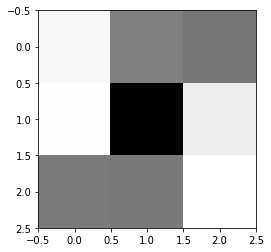

In [4]:
# average image
# compute the mean of the images
vmean = v.mean(axis=1)
# reshape the vmean to a image(3x3)
image = vmean.reshape((3, 3))
# show this average image
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
# display the 'Mittelwert'
print('Mittelwert:\n{}'.format(np.round(vmean, decimals=2)))


vorher:


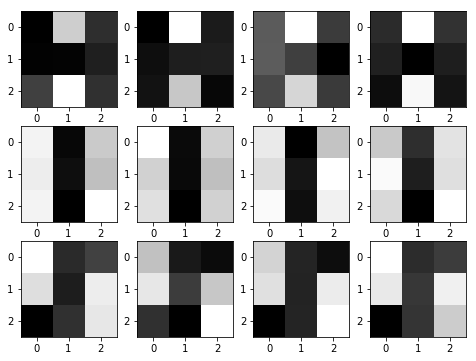

In [5]:
print('vorher:')
show_images(v)


nachher:


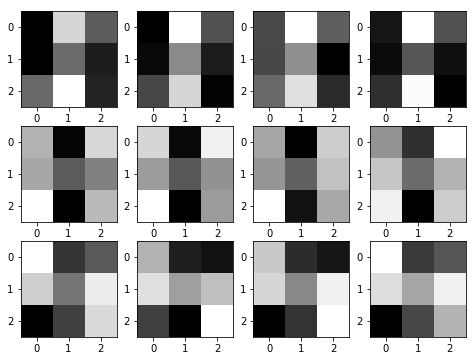

In [6]:
a = (v.T - vmean).T
print('nachher:')
show_images(a)


### c) Bauen Sie die Kovarianzmatrix C
Welche Form hat sie? 

variances in each pixel:
[4008.28025091 3909.21537843 2952.02503223]
[3487.5413053   187.26547556 4052.62098403]
[3626.98370475 3883.00539673 4304.87080566]


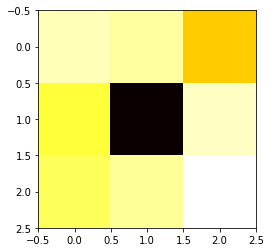

In [7]:
print('variances in each pixel:')
var = a.var(axis=1)
for i in range(3):
    print(var[3*i:3*i+3])

image = var.reshape(vshape);
plt.imshow(image, cmap=plt.cm.hot, interpolation='nearest');


data matrix A has shape (9, 30)
covariance matrix C has shape (9, 9)
C is:
[[ 4008. -3775.  1800.  3533.   -41.  3832.  1865. -3721.  3881.]
 [-3775.  3909. -1658. -3503.   -18. -3805. -1774.  3801. -3952.]
 [ 1800. -1658.  2952.  1349.  -135.  1690.  3106. -1649.  1578.]
 [ 3533. -3503.  1349.  3488.    59.  3563.  1388. -3542.  3743.]
 [  -41.   -18.  -135.    59.   187.    49.   -64.   -88.   -21.]
 [ 3832. -3805.  1690.  3563.    49.  4053.  1712. -3725.  3972.]
 [ 1865. -1774.  3106.  1388.   -64.  1712.  3627. -1741.  1676.]
 [-3721.  3801. -1649. -3542.   -88. -3725. -1741.  3883. -3875.]
 [ 3881. -3952.  1578.  3743.   -21.  3972.  1676. -3875.  4305.]]


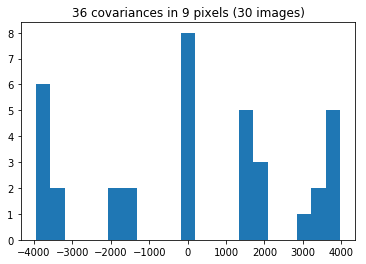

In [8]:
# 
print('data matrix A has shape {}'.format(a.shape))
C = 1./a.shape[1] * np.dot(a, a.T)
print('covariance matrix C has shape {}'.format(C.shape))
print('C is:')
print(np.round(C, decimals=0))

# distribution of 9x8/2 covariances
mask = np.zeros_like(C)
for i in range(C.shape[0]):
    mask[i, 1+i:] = 1
# print('mask:\n{}'.format(mask))
covs = C[mask!=0].flatten()
# print(np.round(covs, decimals=0))
fig = plt.figure(figsize=(6,4))
plt.hist(covs, bins=21);
# help(plt.hist)
plt.title('{} covariances in {} pixels ({} images)'
         .format(covs.shape[0], a.shape[0], a.shape[1]));


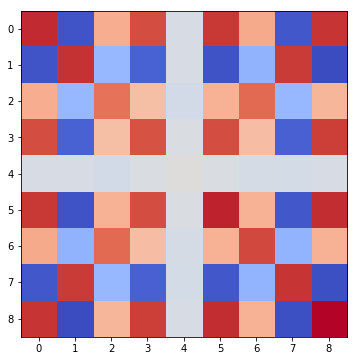

In [9]:
# 
fig = plt.figure(figsize=(6,6))
plt.imshow(C, cmap=plt.cm.coolwarm, interpolation='nearest');


### d) Diagonalisieren Sie die Matrix
Welche Eigenwerte erhalten Sie? Wo würden Sie passenderweise abschneiden?

Welche Eigenvektoren erhalten und welche behalten Sie? Diese einzelnen Vektoren sind Ihre Hauptkomponenten.

Eigenvalues:
[24527.  4633.   334.    36.    45.   260.   231.   163.   184.]
Eigenvektoren:
[[ 0.393 -0.071  0.498 -0.188 -0.226 -0.392  0.415  0.42   0.069]
 [-0.391  0.106  0.172  0.328 -0.517 -0.002 -0.207  0.152  0.604]
 [ 0.207  0.625  0.242 -0.328 -0.062 -0.043 -0.043 -0.589  0.214]
 [ 0.363 -0.175 -0.127  0.042  0.543  0.071 -0.027  0.067  0.717]
 [ 0.001 -0.034 -0.497 -0.588 -0.209 -0.399 -0.39   0.204  0.102]
 [ 0.394 -0.118  0.311  0.319  0.021 -0.216 -0.735 -0.045 -0.21 ]
 [ 0.22   0.714 -0.27   0.267  0.079  0.092 -0.017  0.518 -0.119]
 [-0.387  0.109  0.481 -0.421  0.389  0.26  -0.283  0.36  -0.033]
 [ 0.405 -0.162 -0.022 -0.228 -0.426  0.747 -0.102  0.087  0.002]]


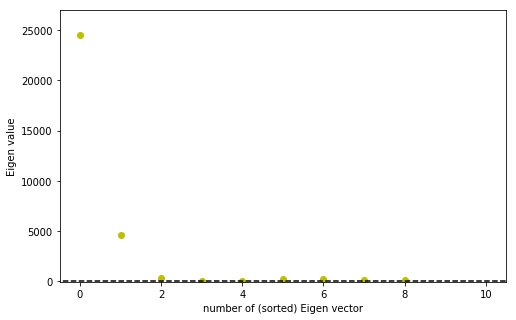

In [10]:
EW, EV = np.linalg.eig(C)

print('Eigenvalues:')
print(np.round(EW, decimals=0))
# draw
plt.figure(figsize=(8, 5))
plt.plot(EW, 'yo');
plt.plot([-1,10.5], 2*[0], 'k--');
plt.xlabel('number of (sorted) Eigen vector');
plt.ylabel('Eigen value');
plt.axis((-.5, 10.5, -min(EW), 1.1*max(EW)));

# abschneiden nach 5 dimensionen
h = 5

# Eigenvektoren
print('Eigenvektoren:')
print(np.round(EV, decimals=3))


### e) Bilden Sie daraus eine passende Projektionsmatrix W
Welche Form haben diese? 

#### A) und B)

In [11]:
liste = [(np.abs(EW[i]), EV[:,i]) for i in range(EW.shape[0])]
# sort the eigenvalues
liste.sort()
# sort it in decrease order(biggest to shortest)
liste.reverse()

U = np.asarray([liste[i][1] for i in range(h)])
print('matix U of first h={} Eigen-vectors has shape {}'.format(h, U.shape))
# print('U:\n{}'.format(U))


matix U of first h=5 Eigen-vectors has shape (5, 9)


### f) Geben Sie die Projektion des ersten Bildes in den Unterraum an
Welche Form haben diese Hauptkomponenten-Anteils-Vektoren?

#### A) und B)

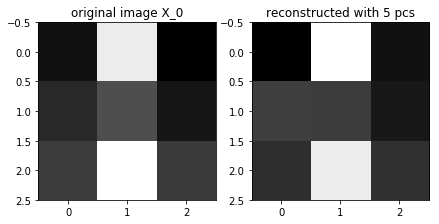

In [12]:
# get 1st image (index is 0)
vH0 = v[:,0]
aH0 = vH0 - vmean
# begin with the average value
v_0 = vmean.copy()

# use the created matrix U, which contain Eigenvectors
for u in U:
    v_0 += np.dot(u, aH0)*u

# draw images
fig = plt.figure(figsize=(7,4))
fig.add_subplot(1,2,1)
image = vH0.reshape(vshape)
plt.title('original image X_0')
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');

fig.add_subplot(1,2,2)
image = v_0.reshape(vshape)
plt.title('reconstructed with {} pcs'.format(h))
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');


### g) Projizieren Sie *alle* Ihre Daten 
Welche Form hat diese Matrix?

#### A) und B)

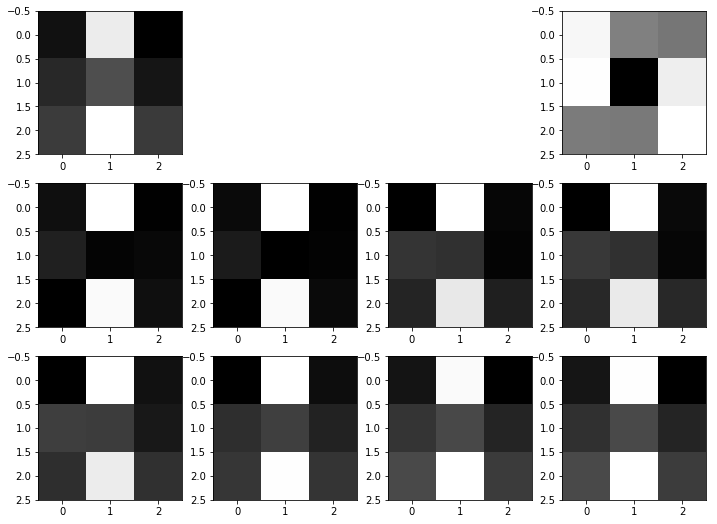

In [13]:
"""
show image #0(H) after 0..8 biggest Eigen values
"""
h = 8
U = np.asarray([liste[i][1] for i in range(h)])
img = 0
vH0 = v[:, img]
aH0 = vH0 - vmean
image = vH0.reshape(vshape)

fig = plt.figure(figsize=(12,9))
fig.add_subplot(3,4,1)
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');

v_0 = vmean.copy()
image = v_0.reshape(vshape)
fig.add_subplot(3,4,4)
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');

for i, u in enumerate(U):
    v_0 += np.dot(u, aH0)*u
    fig.add_subplot(3,4, 5+i)
    image = v_0.reshape(vshape)
    plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');


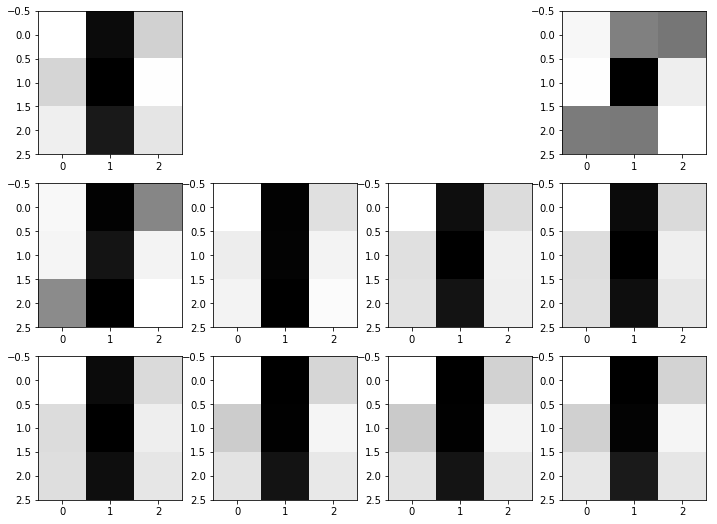

In [14]:
"""
show image #10(I) after 0..8 biggest Eigen values
"""
img = 10
vI0 = v[:, img]
aI0 = vI0 - vmean
image = vI0.reshape(vshape)

fig = plt.figure(figsize=(12,9))
fig.add_subplot(3,4,1)
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');

v_0 = vmean.copy()
image = v_0.reshape(vshape)
fig.add_subplot(3,4,4)
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');

for i, u in enumerate(U):
    v_0 += np.dot(u, aI0)*u
    fig.add_subplot(3,4, 5+i)
    image = v_0.reshape(vshape)
    plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');


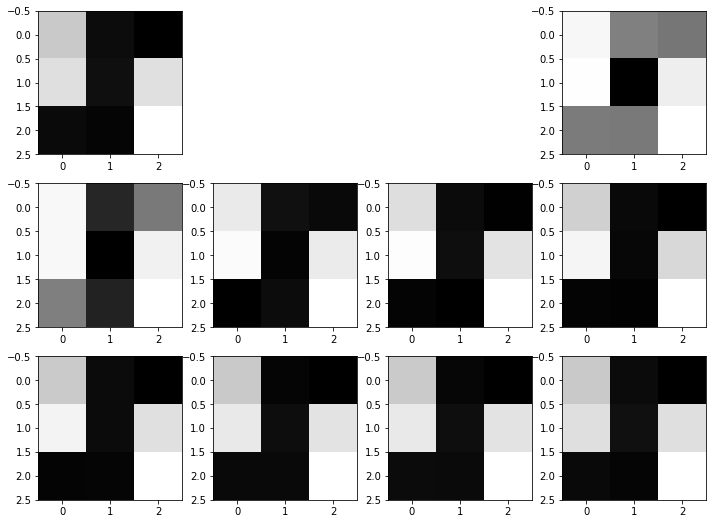

In [15]:
"""
show image #20(S) after 0..8 biggest Eigen values
"""
img = 20
vS0 = v[:, img]
aS0 = vS0 - vmean
image = vS0.reshape(vshape)

fig = plt.figure(figsize=(12,9))
fig.add_subplot(3,4,1)
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');

v_0 = vmean.copy()
image = v_0.reshape(vshape)
fig.add_subplot(3,4,4)
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');

for i, u in enumerate(U):
    v_0 += np.dot(u, aS0)*u
    fig.add_subplot(3,4, 5+i)
    image = v_0.reshape(vshape)
    plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');


## Erstellen Sie Graphiken:
### h) Anteile aller Hauptkomponenten je Pixel
Am besten unterschiedlich klassifiziert (gstrichelt, gepunktet, durchgezogen, ) je nach Buchstaben.

#### A) und B)

Uprime:
[[ 0.39 -0.39  0.21  0.36  0.    0.39  0.22 -0.39  0.41]
 [-0.07  0.11  0.62 -0.17 -0.03 -0.12  0.71  0.11 -0.16]
 [ 0.5   0.17  0.24 -0.13 -0.5   0.31 -0.27  0.48 -0.02]
 [-0.39 -0.   -0.04  0.07 -0.4  -0.22  0.09  0.26  0.75]
 [ 0.41 -0.21 -0.04 -0.03 -0.39 -0.73 -0.02 -0.28 -0.1 ]]

Projection of image v[0] onto 5-dim sub space U has components:
[-194.92    3.19  -29.22    4.48   -8.46  -14.39   16.92   -2.2 ]

All images projected onto PCs: Alpha, which has shape (5, 30)



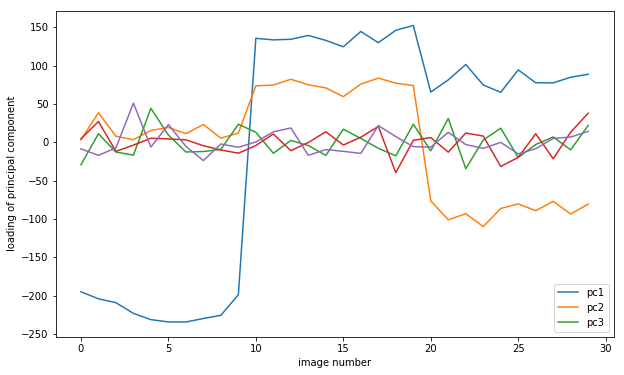

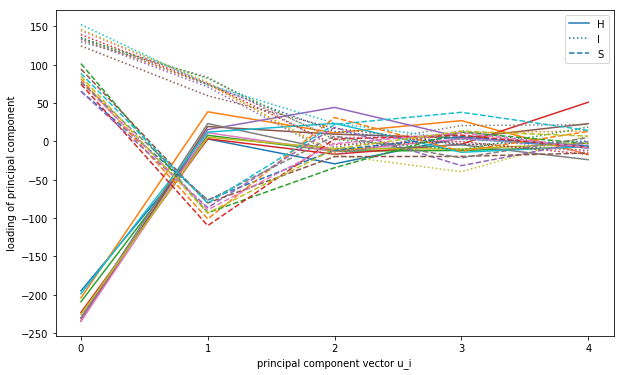

In [16]:
"""
define supb space of first h=5 principal components
"""
h = 5
Uprime = U[:h]
print('Uprime:\n{}\n'.format(np.round(Uprime, decimals=2)))

"""
project an example image a onto sub space U-prime
"""
ao = v[:, 0] - vmean
alpha = U.dot(ao)
print('Projection of image v[0] onto {}-dim sub space U has components:\n{}\n'
     .format(Uprime.shape[0], np.round(alpha, decimals=2)))

"""
transform all n=30 images into sub space U
"""
Alpha = Uprime.dot((v.T-vmean).T)
print('All images projected onto PCs: Alpha, which has shape {}\n'.format(Alpha.shape))

"""
amount of components depends on image
"""
plt.figure(figsize=(10,6))
plt.plot(Alpha.T, ls='-');
plt.xlabel('image number')
plt.ylabel('loading of principal component')
plt.legend(['pc1', 'pc2', 'pc3'], loc='lower right');

"""
show distribution of components within images
"""
plt.figure(figsize=(10,6))
plt.plot(Alpha[:, 0:10], ls='-', label='H');
plt.plot(Alpha[:, 10:20], ls=':', label='I');
plt.plot(Alpha[:, 20:30], ls='--', label='S');
plt.xlabel('principal component vector u_i');
plt.ylabel('loading of principal component');
plt.xticks([0, 1, 2, 3, 4]);
# get axes object and legend entries therein
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::10]
labels = labels[::10]
plt.legend(handles, labels, loc='upper right');

### i) Anteile an der ersten vs. Anteile an der zweiten Hauptkomponente
Reichen diese beiden schon zur Klassifikation in Buchstaben?

Wenn ja: welche Koordinaten $\alpha_1$ und $\alpha_2$ haben die mittleren Buchstaben im Hauptkomponenten-Unterraum?

#### A) und B)

Diese beiden reichen schon zur Klassifikation in Buchstaben.

Im Folgend ist Quellecode.

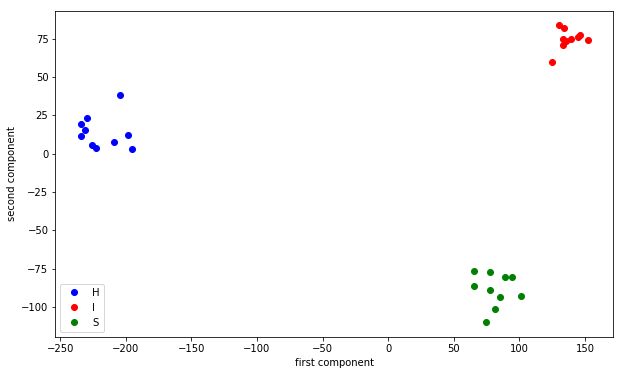

In [17]:
"""
separation according to loading of first two principal components
"""
plt.figure(figsize=(10,6))
plt.plot(Alpha[0, 0:10], Alpha[1, 0:10], 'bo', label='H');
plt.plot(Alpha[0, 10:20], Alpha[1, 10:20], 'ro', label='I');
plt.plot(Alpha[0, 20:30], Alpha[1, 20:30], 'go', label='S');
plt.xlabel('first component')
plt.ylabel('second component')
plt.legend(loc='lower left');


### j) Wenn nein: nehmen Sie eine weitere Hauptkomponente hinzu
Reicht es jetzt?

### k) Machen Sie für je einen Buchstaben je Gruppe eine Rücktransformation auf die ursprünglichen Variabeln und stellen diese Buchstaben dar.
Vergessen Sie nicht den Mittelwert hinzuzufügen. Erkennen Sie Ihre Buchstaben wieder?

#### A) und B)

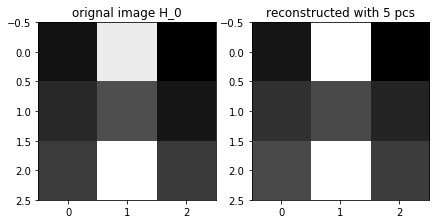

In [18]:
"""
H: reconstructed and orignal
"""
img = 0
vH0 = v[:,img]
aH0 = vH0 - vmean
v_0 = vmean.copy()
for u in U:
    v_0 += np.dot(u, aH0)*u

fig = plt.figure(figsize=(7,4))
fig.add_subplot(1,2,1)
image = vH0.reshape(vshape)
plt.title('orignal image H_0')
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');

fig.add_subplot(1,2,2)
image = v_0.reshape(vshape)
plt.title('reconstructed with 5 pcs')
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');


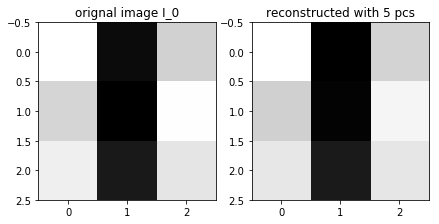

In [19]:
"""
I: reconstructed and orignal
"""
vI0 = v[:,10]
aI0 = vI0 - vmean
v_10 = vmean.copy()
for u in U:
    v_10 += np.dot(u, aI0)*u

fig = plt.figure(figsize=(7,4))
fig.add_subplot(1,2,1)
image = vI0.reshape(vshape)
plt.title('orignal image I_0')
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');

fig.add_subplot(1,2,2)
image = v_10.reshape(vshape)
plt.title('reconstructed with 5 pcs')
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');


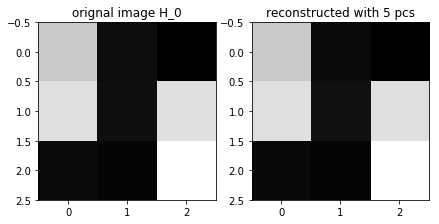

In [20]:
"""
S: reconstructed and orignal
"""
vS0 = v[:,20]
aS0 = vS0 - vmean
v_20 = vmean.copy()
for u in U:
    v_20 += np.dot(u, aS0)*u

fig = plt.figure(figsize=(7,4))
fig.add_subplot(1,2,1)
image = vS0.reshape(vshape)
plt.title('orignal image H_0')
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');

fig.add_subplot(1,2,2)
image = v_20.reshape(vshape)
plt.title('reconstructed with 5 pcs')
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');


#### <span style="color:green">[ab hier optional]</span> 

### l) Seien Sie "gemein" und geben ein verfremdetes Bild vor.
Bei dem Sie einzelne Pixel stark verändern.

Das ist dann so ähnlich wie im Beispiel Gesichterkennung eine Blume zu testen

#### nur B)

variance explained:
[0.7966 0.1546 0.0173 0.009  0.0076 0.0062]


Text(0,0.5,'component weight')

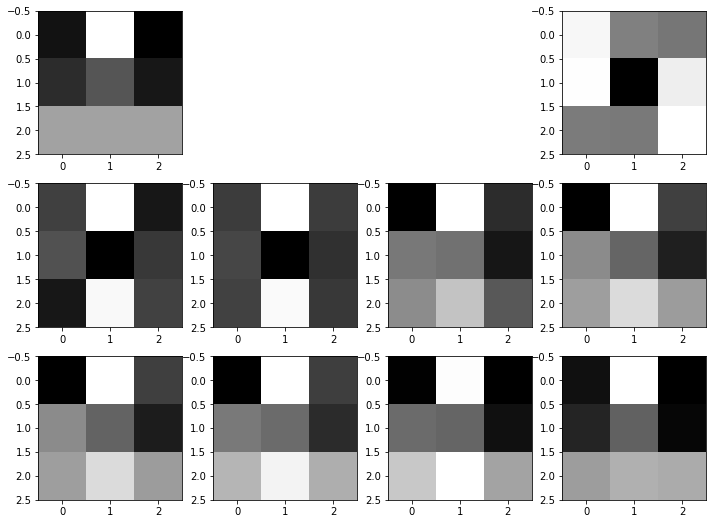

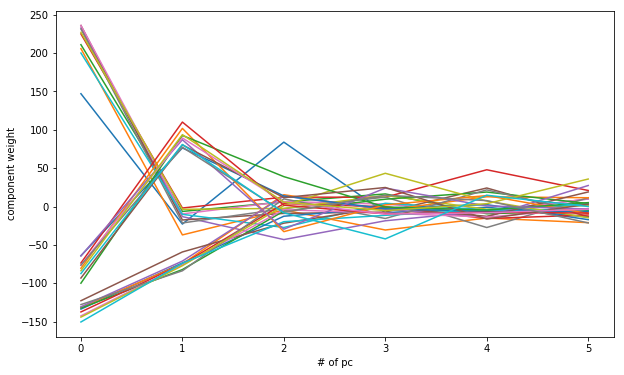

In [23]:
"""
H: reconstructed and orignal
"""
img = 0
vH0 = v[:,img]
vH0[6:] = 128
aH0 = vH0 - vmean
image = vH0.reshape(vshape)

fig = plt.figure(figsize=(12,9))
fig.add_subplot(3,4,1)
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');

v_0 = vmean.copy()
image = v_0.reshape(vshape);
fig.add_subplot(3,4,4)
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');

for m,u in enumerate(U):
    v_0 += np.dot(u, aH0)*u
    fig.add_subplot(3,4, 5+m)
    image = v_0.reshape(vshape)
    plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');

"""
the pca from sklearn on the same data v(images) as before
"""
# X = np.array(v.T) - vmean
# # print(X.shape)
# # set the frame, only 6 components
# pca = PCA(n_components=6)
# # perform the fit to the data
# pca.fit(v.T)
# print('variance explained:\n{}'
#       .format(np.round(pca.explained_variance_ratio_, decimals=4)))

"""
show the weights of all 30 images of calculated first 6 pca components
"""
# x1 = pca.transform(v.T)
# # print(x1.shape)
# plt.figure(figsize=(10,6))
# plt.plot(x1.T);
# plt.xlabel('# of pc')
# plt.ylabel('component weight')


### m) Projizieren Sie dieses Bild in den vorhandenen Unterraum
Dadurch verlieren Sie Information außerhalb der "gelernten" Varianz

### n) und führen Sie auch für diesen die Rückprojektion durch
Erkennen Sie ihr verfremdetes Bild trotzdem wieder?

Das ist dann ein Test, ob Ihre Klassifizierung gut arbeitet, das heißt, die ursprünglichen Bilder den gewünschten Unterraum gut darstellen. 

#### nur B)

(10+2 Punkte)

----

# Aufgabe 3: Schlafverhalten bei Säugetieren

In der *sleep* Datenbank gibt es die Variablen *TotalSleep*, *Dreaming* und *NonDreaming*

(siehe A01 oder Download von http://www.statsci.org/data/general/sleep.html )

### Kopieren Sie sich die Daten in eine Datenmatrix

Vergessen Sie nicht, ungültige Daten (jedoch so wenige wie möglich) zu eliminieren

#### Hinweis:
Ein `numpy.ndarray` erhalten Sie aus dem `DataFrame` mit der empfohlenen Methode: 

    variables = ['a', 'b', 'c']
    xy = df(variables).values 

das Sie optional mittel `.T` transponieren können.

In [22]:
import pandas as pd                     # for Dataframes

# read the data
data = pd.read_csv('sleep.txt', sep='\t',)

# prepare totalsleep, dreaming, nondreaming
idx = ['TotalSleep', 'Dreaming', 'NonDreaming'];
data_set = data[idx]
totalsleep = data_set[['TotalSleep']].T
dreaming = data_set[['Dreaming']].T
nondreaming = data_set[['NonDreaming']].T

print(data_set.head(10))
print(totalsleep.shape)
# variables = ['a', 'b', 'c']
# xy = df(variables).values


   TotalSleep  Dreaming  NonDreaming
0         3.3       NaN          NaN
1         8.3       2.0          6.3
2        12.5       NaN          NaN
3        16.5       NaN          NaN
4         3.9       1.8          2.1
5         9.8       0.7          9.1
6        19.7       3.9         15.8
7         6.2       1.0          5.2
8        14.5       3.6         10.9
9         9.7       1.4          8.3
(1, 62)


### Führen Sie eine PCA durch
(mit der `sklearn` Bibliothek.)

Umgehen Sie Fehlermeldungen wie zB.

    RuntimeWarning: Mean of empty slice     
    
durch Reduzieren der Freiheitsgrade. (Warum?)

### Was ist die Bedeutung der ersten Hauptkomponente?

### Was ist die Bedeutung der zweiten?

### Was können Sie über die dritte sagen?

#### <span style="color:green">[ab hier optional]</span> 
### Veranschaulichen Sie sich das Ergebnis mittels einer 3D Graphik
(wählen Sie einen passenden Blickwinkel)

(5+1 Punkte)

----